In [6]:
#librerias
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
import seaborn as sns

In [7]:
from google.colab import files
uploaded = files.upload()
df = pd.read_excel('HISTORICO_SUERTES.xlsx')
print(df.head())



Saving HISTORICO_SUERTES.xlsx to HISTORICO_SUERTES (2).xlsx
   Período  Hacienda             Nombre  Zona  Tenencia Suerte       Suelo  \
0   201701     80493          LA CONCHA  IP02      51.0   002A   CANTARINA   
1   201701     81284    UKRANIA INCAUCA  IP05      81.0   039B         NaN   
2   201701     80203      EL AMPARO SAA  IP05      31.0    007  CORINTIAS    
3   201701     81380  SAN JUDAS INCAUCA  IP05      82.0   013A         NaN   
4   201701     80298               JAVA  IP06      31.0   025A     GALPON    

   Area Neta  Dist Km   Variedad  ...  Humedad Rel Media Ciclo  \
0       6.00      4.3    CC85-92  ...                      NaN   
1       1.45      NaN    CC85-92  ...                      NaN   
2       8.24     23.0  CC01-1228  ...                      NaN   
3       1.05     66.5  CC01-1940  ...                      NaN   
4       4.53     17.0  RB73-2223  ...                      NaN   

  Oscilacion Temp Med 0-3 Oscilacion Temp Ciclo Sum Oscilacion Temp Ciclo 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 85 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Período                    21027 non-null  int64         
 1   Hacienda                   21027 non-null  int64         
 2   Nombre                     21027 non-null  object        
 3   Zona                       21027 non-null  object        
 4   Tenencia                   21026 non-null  float64       
 5   Suerte                     21027 non-null  object        
 6   Suelo                      17269 non-null  object        
 7   Area Neta                  21027 non-null  float64       
 8   Dist Km                    21022 non-null  float64       
 9   Variedad                   21027 non-null  object        
 10  Cod.Estado #               21027 non-null  int64         
 11  Cod.Estado                 21027 non-null  object        
 12  F.Si

# Explicar desde articulos o documentos por qué se escogio las variables.
Se seleccionaron las X para ambas variables dependientes JOHANA

In [27]:
# Parte 1: Eligiendo variables relevanntes

# Lista de columnas a eliminar
X = df[['Zona', 'Suelo', 'Variedad', 'F.Siembra', 'Cultivo', 'Producto', 'Dosis Madurante', 'Semanas mad.', 'Sac.Caña Precosecha', '%Sac.Caña', '%ATR', '%Fibra Caña', '%AR Jugo', '%ME Tot', 'Brix', 'Pureza', 'Vejez', 'Tipo Quema', 'T.Corte', 'Num.Riegos', 'Cerca de', 'M3 Riego', 'DDUlt.Riego','Lluvias Ciclo', '%Infest.Diatrea',  'Urea 46%', 'Temp. Media Ciclo', 'Temp Max Ciclo',  'Temp Min Ciclo', 'Humedad Rel Media Ciclo', 'Radiacion Solar Ciclo' , 'Oscilacion Temp Ciclo', 'Evaporacion Ciclo']]
# The code was changed to use double brackets [[]] to select multiple columns. This is the correct syntax for pandas.

# Verificar las columnas restantes
X.columns



Index(['Zona', 'Suelo', 'Variedad', 'F.Siembra', 'Cultivo', 'Producto',
       'Dosis Madurante', 'Semanas mad.', 'Sac.Caña Precosecha', '%Sac.Caña',
       '%ATR', '%Fibra Caña', '%AR Jugo', '%ME Tot', 'Brix', 'Pureza', 'Vejez',
       'Tipo Quema', 'T.Corte', 'Num.Riegos', 'Cerca de', 'M3 Riego',
       'DDUlt.Riego', 'Lluvias Ciclo', '%Infest.Diatrea', 'Urea 46%',
       'Temp. Media Ciclo', 'Temp Max Ciclo', 'Temp Min Ciclo',
       'Humedad Rel Media Ciclo', 'Radiacion Solar Ciclo',
       'Oscilacion Temp Ciclo', 'Evaporacion Ciclo'],
      dtype='object')

In [30]:
X.shape

(21027, 33)

# aL FINAL SE SELECCIONO ESTAS VARIABLES Y REDUJO A 33.

TAREA: detectar valores faltantes y posibles outliers. JOHANA hacerlo variable a variable

# TAREA: Visualizar la distribución de las variables de interés (TCH y %Sac.Caña). Análizar y mejorar los gráficos. Cambiar colores y mejorar los gráficos - Diego

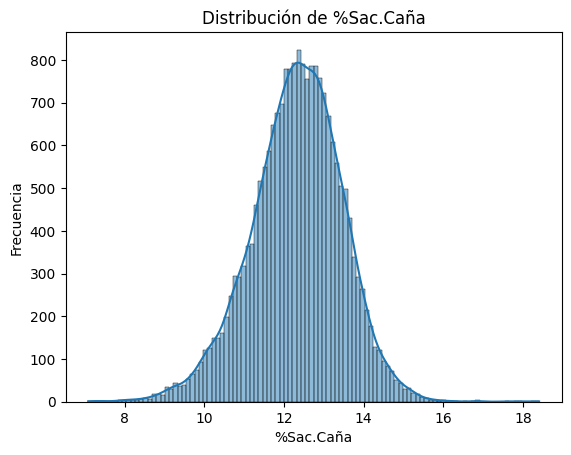

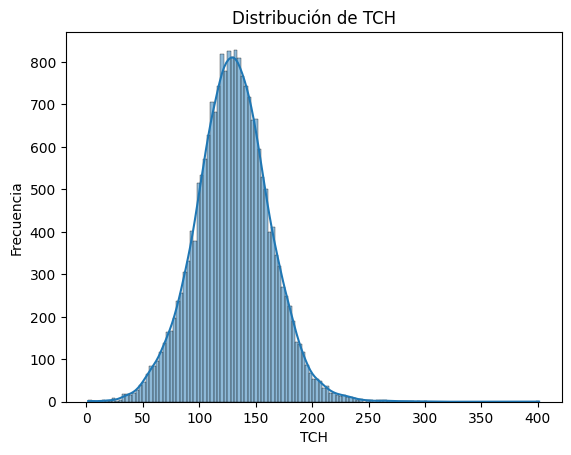

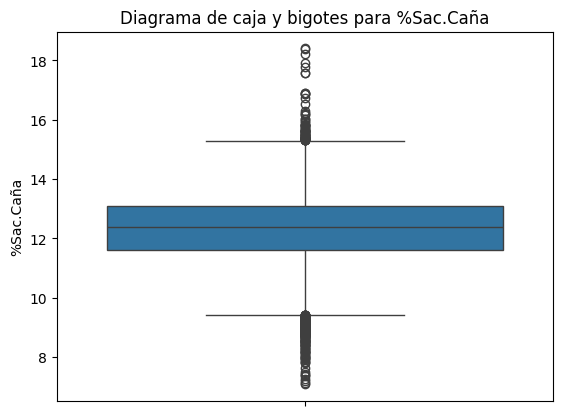

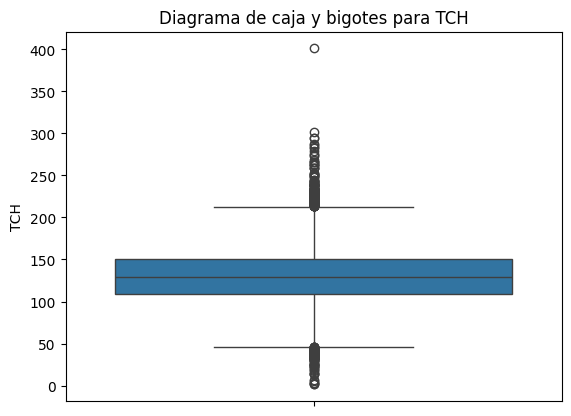

          %Sac.Caña           TCH
count  20578.000000  21027.000000
mean      12.320202    129.608509
std        1.145738     32.846029
min        7.086000      1.573653
25%       11.619000    108.691426
50%       12.370650    129.479600
75%       13.087500    150.407607
max       18.400000    401.045947


In [11]:
# Parte 1: Distribución de las variables de interés ('%Sac.Caña' y 'TCH')

import matplotlib.pyplot as plt
# Análisis de distribución de '%Sac.Caña'
sns.histplot(df['%Sac.Caña'], kde=True)
plt.title('Distribución de %Sac.Caña')
plt.xlabel('%Sac.Caña')
plt.ylabel('Frecuencia')
plt.show()

# Análisis de distribución de 'TCH'
sns.histplot(df['TCH'], kde=True)
plt.title('Distribución de TCH')
plt.xlabel('TCH')
plt.ylabel('Frecuencia')
plt.show()

#Diagrama de caja y bigotes para '%Sac.Caña'
sns.boxplot(y=df['%Sac.Caña'])
plt.title('Diagrama de caja y bigotes para %Sac.Caña')
plt.show()

#Diagrama de caja y bigotes para 'TCH'
sns.boxplot(y=df['TCH'])
plt.title('Diagrama de caja y bigotes para TCH')
plt.show()

# Resumen estadístico de '%Sac.Caña' y 'TCH'
print(df[['%Sac.Caña', 'TCH']].describe())


Desarrollo de Modelos:

Ajustar modelos de regresión lineal para predecir TCH y %Sac.Caña.
Analizar la significancia de las variables, interpretar los coeficientes y evaluar los supuestos del modelo (linealidad, homocedasticidad, normalidad de errores, etc.).
Diagnosticar posibles problemas como la multicolinealidad o la presencia de observaciones atípicas, y proponer soluciones (por ejemplo, técnicas de regularización).   **JOHANA SAC%** **JAISON TCH**

# Validación y Evaluación:

Utilizar estrategias de validación (holdout y/o validación cruzada) para evaluar el desempeño del modelo.
Calcular al menos dos métricas de evaluación apropiadas (por ejemplo, R², RMSE, MAE) y discutir los resultados. **(1PERSONA DIEGO)**